# 1 Data Cleaning

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None) #show all columns
import numpy as np

csv = ("individual-finance-v2.csv")
df = pd.read_csv(csv)
df.head(3)

,PostCode,Gender,Age,Demographics,Ethnicity,Religion,Immigration,Education,Field.of.Study,Profession,Marital.Status,Family.Size,Dwelling,Personal.Income,credit_card,pay_balance,refuse_cc,mortgage,budget,unexpected_500,unexpected_5000,fin_situation,csb,gic,real_estate,mutual_funds,resp,rrif,rrsp,stocks,term,other
0,M5A3Z2,M,65+,65 years and over-Male,British Isles origins,Christian,Immigrants. An immigrant refers to a person wh...,Bachelor's degree,Social and behavioural sciences and law,44-45 Retail trade,Married,2 persons,Single-detached house: A single dwelling not a...,"$150,000 and over",Percent Household Having Credit Cards: 5+ Cards,Percent Household Usually Do Not Pay Off Balan...,Percent Household in Which Someone Was Refused...,Percent Homeowner without Mortgage Among All H...,Percent Household that Has No Budget,Percent Household who Would Finance an Unexpec...,Percent Household who Would Finance an Unexpec...,Percent Household Whose Financial Situation in...,Canada Savings Bonds,NaN,NaN,NaN,NaN,NaN,NaN,Stocks,NaN,Other bonds
1,M5A3Z2,F,65+,65 years and over-Female,Chinese,No religious affiliation,Immigrants. An immigrant refers to a person wh...,Secondary (high) school diploma or equivalency...,"Mathematics, computer and information sciences",52 Finance and insurance,Widowed,3 persons,Other attached dwelling,"$40,000 to $49,999",Percent Household Having Credit Cards: 3-4 Cards,Percent Household Usually Do Not Pay Off Balan...,Percent Household in Which Someone Was Refused...,Percent Homeowner without Mortgage Among All H...,Percent Household that Has Budget,Percent Household who Would Finance an Unexpec...,Percent Household who Would Finance an Unexpec...,Percent Household Whose Financial Situation in...,Canada Savings Bonds,NaN,Real estate Investment,NaN,NaN,NaN,NaN,Stocks,NaN,Other bonds
2,M5A3Z2,F,65+,65 years and over-Female,Western European origins (except French origins),Christian,Non-immigrants. Refer to persons who are Canad...,"No certificate, diploma or degree",Education,"54 Professional, scientific and technical serv...",Married,2 persons,Other attached dwelling,"$10,000 to $19,999",Percent Household Having Credit Cards: 1-2 Cards,Percent Household Usually Do Not Pay Off Balan...,Percent Household in Which Someone Was Refused...,Percent Homeowner with Mortgage Among All Hou...,Percent Household that Has Budget,Percent Household who Would Finance an Unexpec...,Percent Household who Would Finance an Unexpec...,Percent Household Whose Financial Situation in...,Canada Savings Bonds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.shape)
df.isnull().sum(axis = 0) #check total missing values for each column

(3887, 32)


PostCode              0
Gender                0
Age                   0
Demographics          0
Ethnicity             0
Religion              0
Immigration           0
Education           433
Field.of.Study      433
Profession          433
Marital.Status      433
Family.Size         433
Dwelling            433
Personal.Income     433
credit_card         562
pay_balance         562
refuse_cc           562
mortgage            562
budget              562
unexpected_500      562
unexpected_5000     562
fin_situation       562
csb                2319
gic                3398
real_estate        2947
mutual_funds       3746
resp               3717
rrif               3816
rrsp               3669
stocks             3276
term               3766
other              2765
dtype: int64

In [3]:
df["Demographics"].value_counts() #explore age group

65 years and over-Female    323
65 years and over-Male      258
0 to 14 years-Male          218
0 to 14 years-Female        215
35 to 39 years-Female       181
30 to 34 years-Female       181
35 to 39 years-Male         179
50 to 54 years-Male         178
45 to 49 years-Male         175
55 to 59 years-Male         173
40 to 44 years-Male         166
40 to 44 years-Female       160
30 to 34 years-Male         160
60 to 64 years-Male         158
50 to 54 years-Female       152
45 to 49 years-Female       151
25 to 29 years-Female       141
55 to 59 years-Female       141
60 to 64 years-Female       138
25 to 29 years-Male         131
20 to 24 years-Female        90
20 to 24 years-Male          89
15 to 19 years-Male          66
15 to 19 years-Female        63
Name: Demographics, dtype: int64

In [4]:
# These demographic groups explains columns with 562 missing values
group = ["0 to 14 years-Male", "0 to 14 years-Female", "15 to 19 years-Male", "15 to 19 years-Female"]
value = 0
for groups in group:
    grp = len(df.loc[(df["Demographics"] == groups)])
    value += grp
print(value)

# These demographic groups explains columns with 433 missing values
group = ["0 to 14 years-Male", "0 to 14 years-Female"]
value = 0
for groups in group:
    grp = len(df.loc[(df["Demographics"] == groups)])
    value += grp
print(value)

562
433


In [5]:
# remove demographics who are not adults (data not significant)
group = ["0 to 14 years-Male", "0 to 14 years-Female", "15 to 19 years-Male", "15 to 19 years-Female"]
for removeGroups in group:
    df = df[df.Demographics != removeGroups]

# remove the entire "Age" column (since we have demographics column)
# remove the entire "PostCode" column (we are not using postal code column at this time)
column = ['Age', 'PostCode']
for removeColumn in column:
    df = df.loc[:, df.columns != removeColumn]

In [6]:
data = df.copy()        #make a copy
print(data.shape)       #check for size and column

(3325, 30)


# 2 Data Analysis

https://towardsdatascience.com/modeling-telecom-customer-churn-with-variational-autoencoder-4e5cf6194871

## 2.1 Identify Clusters

In [7]:
data["Demographics"].value_counts().sort_index() #explore age group

20 to 24 years-Female        90
20 to 24 years-Male          89
25 to 29 years-Female       141
25 to 29 years-Male         131
30 to 34 years-Female       181
30 to 34 years-Male         160
35 to 39 years-Female       181
35 to 39 years-Male         179
40 to 44 years-Female       160
40 to 44 years-Male         166
45 to 49 years-Female       151
45 to 49 years-Male         175
50 to 54 years-Female       152
50 to 54 years-Male         178
55 to 59 years-Female       141
55 to 59 years-Male         173
60 to 64 years-Female       138
60 to 64 years-Male         158
65 years and over-Female    323
65 years and over-Male      258
Name: Demographics, dtype: int64

In [8]:
# Filter 5 new clusters
Group1 = ['20 to 24 years-Female', '20 to 24 years-Male', '25 to 29 years-Female', '25 to 29 years-Male']
data1 = pd.DataFrame()
for d1 in Group1:
    filter1 = data[data['Demographics'] == d1]
    data1 = pd.concat([data1, filter1])
    data1 = data1.reset_index(drop=True) 
print('Cluster 1 - ' + str(len(data1)) + ' sample size')
print(data1['Demographics'].value_counts().sort_index())

Group2 = ['30 to 34 years-Female', '30 to 34 years-Male', '35 to 39 years-Female', '35 to 39 years-Male']
data2 = pd.DataFrame()
for d2 in Group2:
    filter2 = data[data['Demographics'] == d2]
    data2 = pd.concat([data2, filter2])
    data2 = data2.reset_index(drop=True) 
print('\nCluster 2 - ' + str(len(data2)) + ' sample size')
print(data2['Demographics'].value_counts().sort_index())

Group3 = ['40 to 44 years-Female', '40 to 44 years-Male', '45 to 49 years-Female', '45 to 49 years-Male']
data3 = pd.DataFrame()
for d3 in Group3:
    filter3 = data[data['Demographics'] == d3]
    data3 = pd.concat([data3, filter3])
    data3 = data3.reset_index(drop=True) 
print('\nCluster 3 - ' + str(len(data3)) + ' sample size')
print(data3['Demographics'].value_counts().sort_index())

Group4 = ['50 to 54 years-Female', '50 to 54 years-Male', '55 to 59 years-Female', '55 to 59 years-Male']
data4 = pd.DataFrame()
for d4 in Group4:
    filter4 = data[data['Demographics'] == d4]
    data4 = pd.concat([data4, filter4])
    data4 = data4.reset_index(drop=True) 
print('\nCluster 4 - ' + str(len(data4)) + ' sample size')
print(data4['Demographics'].value_counts().sort_index())

Group5 = ['60 to 64 years-Female', '60 to 64 years-Male', '65 years and over-Female', '65 years and over-Male']
data5 = pd.DataFrame()
for d5 in Group5:
    filter5 = data[data['Demographics'] == d5]
    data5 = pd.concat([data5, filter5])
    data5 = data5.reset_index(drop=True) 
print('\nCluster 5 - ' + str(len(data5)) + ' sample size')
print(data5['Demographics'].value_counts().sort_index())

GroupTotal = [data1, data2, data3, data4, data5]
totalLength = 0
for total in GroupTotal:
    totalLength += len(total)
print('\nTotal sample size: ' + str(totalLength))

Cluster 1 - 451 sample size
20 to 24 years-Female     90
20 to 24 years-Male       89
25 to 29 years-Female    141
25 to 29 years-Male      131
Name: Demographics, dtype: int64

Cluster 2 - 701 sample size
30 to 34 years-Female    181
30 to 34 years-Male      160
35 to 39 years-Female    181
35 to 39 years-Male      179
Name: Demographics, dtype: int64

Cluster 3 - 652 sample size
40 to 44 years-Female    160
40 to 44 years-Male      166
45 to 49 years-Female    151
45 to 49 years-Male      175
Name: Demographics, dtype: int64

Cluster 4 - 644 sample size
50 to 54 years-Female    152
50 to 54 years-Male      178
55 to 59 years-Female    141
55 to 59 years-Male      173
Name: Demographics, dtype: int64

Cluster 5 - 877 sample size
60 to 64 years-Female       138
60 to 64 years-Male         158
65 years and over-Female    323
65 years and over-Male      258
Name: Demographics, dtype: int64

Total sample size: 3325


In [9]:
list(data1)

['Gender',
 'Demographics',
 'Ethnicity',
 'Religion',
 'Immigration',
 'Education',
 'Field.of.Study',
 'Profession',
 'Marital.Status',
 'Family.Size',
 'Dwelling',
 'Personal.Income',
 'credit_card',
 'pay_balance',
 'refuse_cc',
 'mortgage',
 'budget',
 'unexpected_500',
 'unexpected_5000',
 'fin_situation',
 'csb',
 'gic',
 'real_estate',
 'mutual_funds',
 'resp',
 'rrif',
 'rrsp',
 'stocks',
 'term',
 'other']

## 2.2 Cluster 1

Demographics                                 451
Stocks                                         3
Mutual funds                                   5
Registered Retirement Savings Plan (RRSP)      2
Real estate Investment                       103
dtype: int64


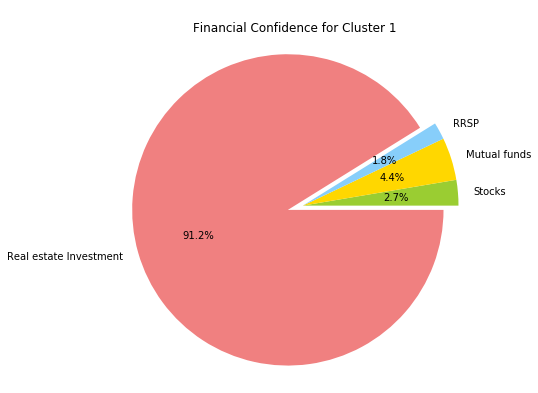

In [10]:
# Filter Financial Confidence for Cluster 1
fin1 = ['stocks', 'mutual_funds', 'rrsp', 'real_estate']
data1_fin = data1[['Demographics']]
for f1 in fin1:
    dummies_fin1 = pd.get_dummies(data1[f1],dtype=float) #apply get_dummies
    data1_fin = pd.concat([data1_fin, dummies_fin1], axis = 1)   #combine data and dummies (axis=1 for columns)
    data1_fin = data1_fin.reset_index(drop=True) 

# Value counts for all columns
print(data1_fin.astype(bool).sum(axis=0))

# Pie Chart of Financial Confidence for Cluster 1
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['Stocks', 'Mutual funds', 'RRSP', 'Real estate Investment']
sizes = [data1_fin['Stocks'].value_counts()[1],
         data1_fin['Mutual funds'].value_counts()[1],
         data1_fin['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data1_fin['Real estate Investment'].value_counts()[1]
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nFinancial Confidence for Cluster 1')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Financial Confidence for Cluster 1
data1_fin = (
    0.25*len(data1_fin[data1_fin['Stocks'] != 0]), 0.25*len(data1_fin[data1_fin['Mutual funds'] != 0]),
    0.25*len(data1_fin[data1_fin['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.25*len(data1_fin[data1_fin['Real estate Investment'] != 0])
)
data1_fin = sum(data1_fin)

Demographics                          451
Term deposits                           2
Stocks                                  3
Mutual funds                            5
Canada Savings Bonds                   91
Guaranteed Investment Certificates     95
dtype: int64


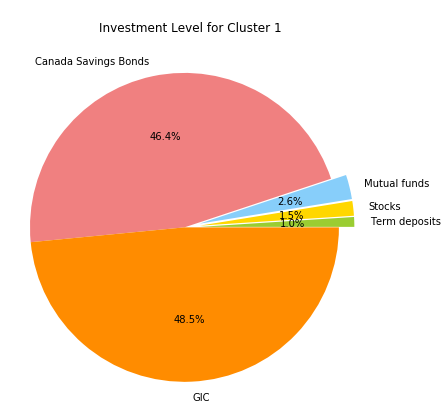

In [11]:
# Filter Investment Level for Cluster 1
invest1 = ['term', 'stocks', 'mutual_funds', 'csb', 'gic']
data1_invest = data1[['Demographics']]
for i1 in invest1:
    dummies_invest1 = pd.get_dummies(data1[i1],dtype=float) #apply get_dummies
    data1_invest = pd.concat([data1_invest, dummies_invest1], axis = 1)   #combine data and dummies (axis=1 for columns)
    data1_invest = data1_invest.reset_index(drop=True) 

# Value counts for all columns
print(data1_invest.astype(bool).sum(axis=0))
    
# Pie Chart of Investment Level for Cluster 1
labels = ['Term deposits', 'Stocks', 'Mutual funds', 'Canada Savings Bonds', 'GIC']
sizes = [data1_invest['Term deposits'].value_counts()[1],
         data1_invest['Stocks'].value_counts()[1],
         data1_invest['Mutual funds'].value_counts()[1],
         data1_invest['Canada Savings Bonds'].value_counts()[1],
         data1_invest['Guaranteed Investment Certificates'].value_counts()[1] 
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0.1, 0.1, 0.1, 0.0, 0.0)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nInvestment Level for Cluster 1\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Investment Level for Cluster 1
data1_invest = (
    0.20*len(data1_invest[data1_invest['Term deposits'] != 0]),
    0.20*len(data1_invest[data1_invest['Stocks'] != 0]),
    0.20*len(data1_invest[data1_invest['Mutual funds'] != 0]),
    0.20*len(data1_invest[data1_invest['Canada Savings Bonds'] != 0]),
    0.20*len(data1_invest[data1_invest['Guaranteed Investment Certificates'] != 0])
)
data1_invest = sum(data1_invest)

Demographics              451
Real estate Investment    103
dtype: int64


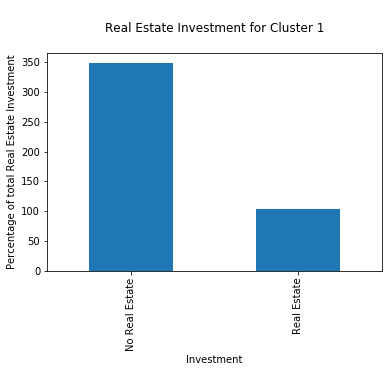

In [12]:
# Filter Real Estate for Cluster 1
data1_real = data1[['Demographics']]
dummies_real1 = pd.get_dummies(data1['real_estate'],dtype=float) #apply get_dummies
data1_real = pd.concat([data1_real, dummies_real1], axis = 1)   #combine data and dummies (axis=1 for columns)
data1_real = data1_real.reset_index(drop=True)  

# Value counts for all columns
print(data1_real.astype(bool).sum(axis=0))

# Bar Graph of Real Estate for Cluster 1
data1_real_graph = data1_real.copy()
data1_real_graph.loc[data1_real_graph['Real estate Investment']== 0.0,'Real estate Investment']='No Real Estate' # Rename
data1_real_graph.loc[data1_real_graph['Real estate Investment']== 1.0,'Real estate Investment']='Real Estate' # Rename
b = data1_real_graph['Real estate Investment'].value_counts()
bx = b.plot(kind='bar', title='\nReal Estate Investment for Cluster 1\n')
bx.set_xlabel('Investment')
bx.set_ylabel('Percentage of total Real Estate Investment')
plt.show()

# Create weighted aggregate of Real Estate for Cluster 1
data1_real = (len(data1_real[data1_real['Real estate Investment'] != 0 ]))

Demographics                                 451
Registered Retirement Savings Plan (RRSP)      2
Registered Retirement Income Fund (RRIF)      15
dtype: int64


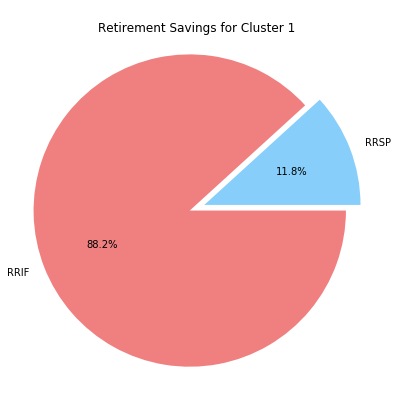

In [13]:
# Filter Retirement for Cluster 1
retire1 = ['rrsp', 'rrif']
data1_retire = data1[['Demographics']]
for r1 in retire1:
    dummies_retire1 = pd.get_dummies(data1[r1],dtype=float) #apply get_dummies
    data1_retire = pd.concat([data1_retire, dummies_retire1], axis = 1)   #combine data and dummies (axis=1 for columns)
    data1_retire = data1_retire.reset_index(drop=True) 
    
# Value counts for all columns
print(data1_retire.astype(bool).sum(axis=0))

# Pie Chart of Retirement for Cluster 1
labels = ['RRSP', 'RRIF']
sizes = [data1_retire['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data1_retire['Registered Retirement Income Fund (RRIF)'].value_counts()[1],
        ]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nRetirement Savings for Cluster 1')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Retirement for Cluster 1
data1_retire = (
    0.50*len(data1_retire[data1_retire['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.50*len(data1_retire[data1_retire['Registered Retirement Income Fund (RRIF)'] != 0]),
)
data1_retire = sum(data1_retire)

In [14]:
# Combine all weight aggregates for Cluster 1
c1 = {'Cluster Name': ['TBD'],
     'Age Group': ["20 to 29"],
     'Financial Confidence': [data1_fin],
     'Investment': [data1_invest],
     'Real Estate': [data1_real],
     'Retirement': [data1_retire]}
dataCluster1 = pd.DataFrame(c1)
dataCluster1

,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,20 to 29,28.25,39.2,103,8.5


## 2.3 Cluster 2

Demographics                                 701
Stocks                                         9
Mutual funds                                   4
Registered Retirement Savings Plan (RRSP)     38
Real estate Investment                       201
dtype: int64


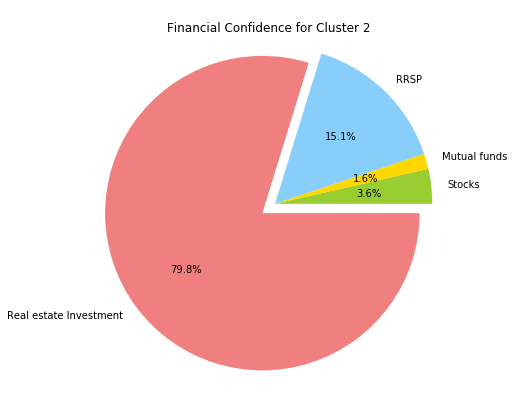

In [15]:
# Filter Financial Confidence for Cluster 2
fin2 = ['stocks', 'mutual_funds', 'rrsp', 'real_estate']
data2_fin = data2[['Demographics']]
for f2 in fin2:
    dummies_fin2 = pd.get_dummies(data2[f2],dtype=float) #apply get_dummies
    data2_fin = pd.concat([data2_fin, dummies_fin2], axis = 1)   #combine data and dummies (axis=1 for columns)
    data2_fin = data2_fin.reset_index(drop=True) 

# Value counts for all columns
print(data2_fin.astype(bool).sum(axis=0))

# Pie Chart of Financial Confidence for Cluster 2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['Stocks', 'Mutual funds', 'RRSP', 'Real estate Investment']
sizes = [data2_fin['Stocks'].value_counts()[1],
         data2_fin['Mutual funds'].value_counts()[1],
         data2_fin['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data2_fin['Real estate Investment'].value_counts()[1]
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nFinancial Confidence for Cluster 2')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Financial Confidence for Cluster 2
data2_fin = (
    0.25*len(data2_fin[data2_fin['Stocks'] != 0]), 0.25*len(data2_fin[data2_fin['Mutual funds'] != 0]),
    0.25*len(data2_fin[data2_fin['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.25*len(data2_fin[data2_fin['Real estate Investment'] != 0])
)
data2_fin = sum(data2_fin)

Demographics                          701
Term deposits                           7
Stocks                                  9
Mutual funds                            4
Canada Savings Bonds                  302
Guaranteed Investment Certificates     99
dtype: int64


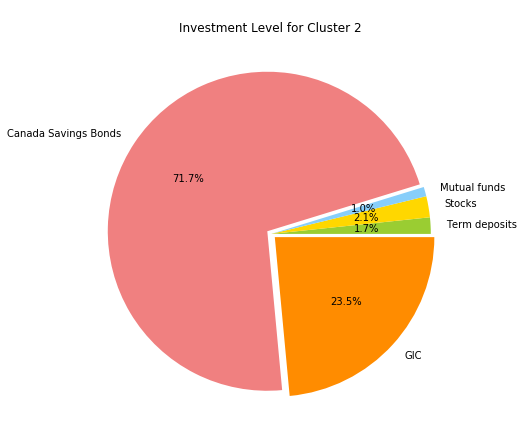

In [16]:
# Filter Investment Level for Cluster 2
invest2 = ['term', 'stocks', 'mutual_funds', 'csb', 'gic']
data2_invest = data2[['Demographics']]
for i2 in invest2:
    dummies_invest2 = pd.get_dummies(data2[i2],dtype=float) #apply get_dummies
    data2_invest = pd.concat([data2_invest, dummies_invest2], axis = 1)   #combine data and dummies (axis=1 for columns)
    data2_invest = data2_invest.reset_index(drop=True) 

# Value counts for all columns
print(data2_invest.astype(bool).sum(axis=0))

# Pie Chart of Investment Level for Cluster 2
labels = ['Term deposits', 'Stocks', 'Mutual funds', 'Canada Savings Bonds', 'GIC']
sizes = [data2_invest['Term deposits'].value_counts()[1],
         data2_invest['Stocks'].value_counts()[1],
         data2_invest['Mutual funds'].value_counts()[1],
         data2_invest['Canada Savings Bonds'].value_counts()[1],
         data2_invest['Guaranteed Investment Certificates'].value_counts()[1] 
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nInvestment Level for Cluster 2\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Investment Level for Cluster 2
data2_invest = (
    0.20*len(data2_invest[data2_invest['Term deposits'] != 0]),
    0.20*len(data2_invest[data2_invest['Stocks'] != 0]),
    0.20*len(data2_invest[data2_invest['Mutual funds'] != 0]),
    0.20*len(data2_invest[data2_invest['Canada Savings Bonds'] != 0]),
    0.20*len(data2_invest[data2_invest['Guaranteed Investment Certificates'] != 0])
)
data2_invest = sum(data2_invest)

Demographics              701
Real estate Investment    201
dtype: int64


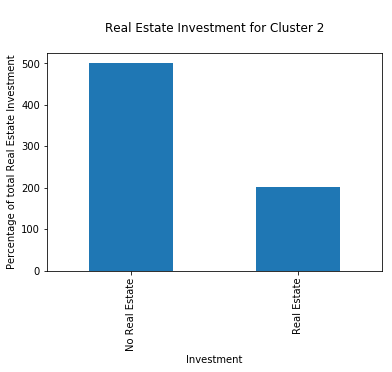

In [17]:
# Filter Real Estate for Cluster 2
data2_real = data2[['Demographics']]
dummies_real2 = pd.get_dummies(data2['real_estate'],dtype=float) #apply get_dummies
data2_real = pd.concat([data2_real, dummies_real2], axis = 1)   #combine data and dummies (axis=1 for columns)
data2_real = data2_real.reset_index(drop=True) 

# Value counts for all columns
print(data2_real.astype(bool).sum(axis=0))

# Bar Graph of Real Estate for Cluster 2
data2_real_graph = data2_real.copy()
data2_real_graph.loc[data2_real_graph['Real estate Investment']== 0.0,'Real estate Investment']='No Real Estate' # Rename
data2_real_graph.loc[data2_real_graph['Real estate Investment']== 1.0,'Real estate Investment']='Real Estate' # Rename
b = data2_real_graph['Real estate Investment'].value_counts()
bx = b.plot(kind='bar', title='\nReal Estate Investment for Cluster 2\n')
bx.set_xlabel('Investment')
bx.set_ylabel('Percentage of total Real Estate Investment')
plt.show()

# Create weighted aggregate of Real Estate for Cluster 2
data2_real = (len(data2_real[data2_real['Real estate Investment'] != 0 ]))

Demographics                                 701
Registered Retirement Savings Plan (RRSP)     38
Registered Retirement Income Fund (RRIF)       7
dtype: int64


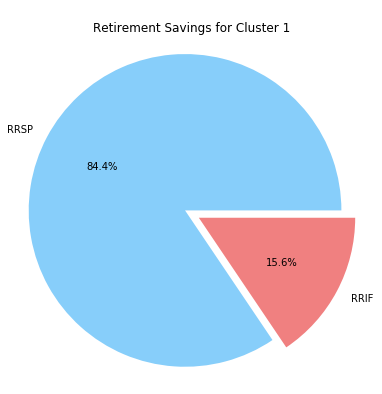

In [18]:
# Filter Retirement for Cluster 2
retire2 = ['rrsp', 'rrif']
data2_retire = data2[['Demographics']]
for r2 in retire2:
    dummies_retire2 = pd.get_dummies(data2[r2],dtype=float) #apply get_dummies
    data2_retire = pd.concat([data2_retire, dummies_retire2], axis = 1)   #combine data and dummies (axis=1 for columns)
    data2_retire = data2_retire.reset_index(drop=True) 

# Value counts for all columns
print(data2_retire.astype(bool).sum(axis=0))

# Pie Chart of Retirement for Cluster 2
labels = ['RRSP', 'RRIF']
sizes = [data2_retire['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data2_retire['Registered Retirement Income Fund (RRIF)'].value_counts()[1],
        ]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nRetirement Savings for Cluster 1')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Retirement for Cluster 2
data2_retire = (
    0.50*len(data2_retire[data2_retire['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.50*len(data2_retire[data2_retire['Registered Retirement Income Fund (RRIF)'] != 0]),
)
data2_retire = sum(data2_retire)

In [19]:
# Combine all weight aggregates for Cluster 2
c2 = {'Cluster Name': ['TBD'],
     'Age Group': ["30 to 39"],
     'Financial Confidence': [data2_fin],
     'Investment': [data2_invest],
     'Real Estate': [data2_real],
     'Retirement': [data2_retire]}
dataCluster2 = pd.DataFrame(c2)
dataCluster2

,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,30 to 39,63.0,84.2,201,22.5


## 2.4 Cluster 3

Demographics                                 652
Stocks                                        71
Mutual funds                                  23
Registered Retirement Savings Plan (RRSP)    110
Real estate Investment                        66
dtype: int64


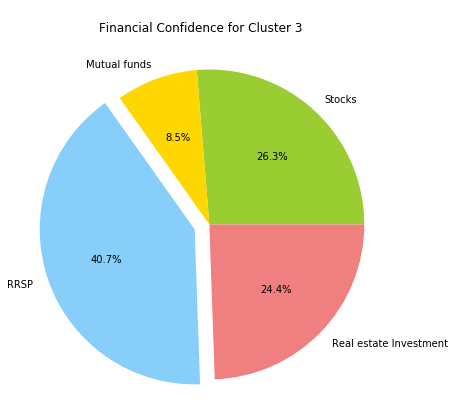

In [20]:
# Filter Financial Confidence for Cluster 3
fin3 = ['stocks', 'mutual_funds', 'rrsp', 'real_estate']
data3_fin = data3[['Demographics']]
for f3 in fin3:
    dummies_fin3 = pd.get_dummies(data3[f3],dtype=float) #apply get_dummies
    data3_fin = pd.concat([data3_fin, dummies_fin3], axis = 1)   #combine data and dummies (axis=1 for columns)
    data3_fin = data3_fin.reset_index(drop=True) 
    
# Value counts for all columns
print(data3_fin.astype(bool).sum(axis=0))

# Pie Chart of Financial Confidence for Cluster 3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['Stocks', 'Mutual funds', 'RRSP', 'Real estate Investment']
sizes = [data3_fin['Stocks'].value_counts()[1],
         data3_fin['Mutual funds'].value_counts()[1],
         data3_fin['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data3_fin['Real estate Investment'].value_counts()[1]
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1, 0.0)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nFinancial Confidence for Cluster 3\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Financial Confidence for Cluster 3
data3_fin = (
    0.25*len(data3_fin[data3_fin['Stocks'] != 0]), 0.25*len(data3_fin[data3_fin['Mutual funds'] != 0]),
    0.25*len(data3_fin[data3_fin['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.25*len(data3_fin[data3_fin['Real estate Investment'] != 0])
)
data3_fin = sum(data3_fin)

Demographics                          652
Term deposits                          45
Stocks                                 71
Mutual funds                           23
Canada Savings Bonds                  402
Guaranteed Investment Certificates    120
dtype: int64


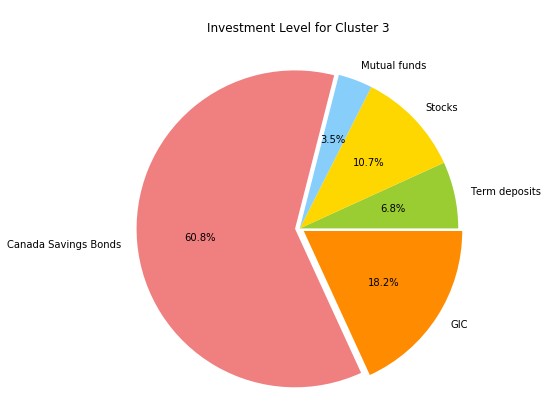

In [21]:
# Filter Investment Level for Cluster 3
invest3 = ['term', 'stocks', 'mutual_funds', 'csb', 'gic']
data3_invest = data3[['Demographics']]
for i3 in invest3:
    dummies_invest3 = pd.get_dummies(data3[i3],dtype=float) #apply get_dummies
    data3_invest = pd.concat([data3_invest, dummies_invest3], axis = 1)   #combine data and dummies (axis=1 for columns)
    data3_invest = data3_invest.reset_index(drop=True) 

# Value counts for all columns
print(data3_invest.astype(bool).sum(axis=0))

# Pie Chart of Investment Level for Cluster 3
labels = ['Term deposits', 'Stocks', 'Mutual funds', 'Canada Savings Bonds', 'GIC']
sizes = [data3_invest['Term deposits'].value_counts()[1],
         data3_invest['Stocks'].value_counts()[1],
         data3_invest['Mutual funds'].value_counts()[1],
         data3_invest['Canada Savings Bonds'].value_counts()[1],
         data3_invest['Guaranteed Investment Certificates'].value_counts()[1] 
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nInvestment Level for Cluster 3\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Investment Level for Cluster 3
data3_invest = (
    0.20*len(data3_invest[data3_invest['Term deposits'] != 0]),
    0.20*len(data3_invest[data3_invest['Stocks'] != 0]),
    0.20*len(data3_invest[data3_invest['Mutual funds'] != 0]),
    0.20*len(data3_invest[data3_invest['Canada Savings Bonds'] != 0]),
    0.20*len(data3_invest[data3_invest['Guaranteed Investment Certificates'] != 0])
)
data3_invest = sum(data3_invest)

Demographics              652
Real estate Investment     66
dtype: int64


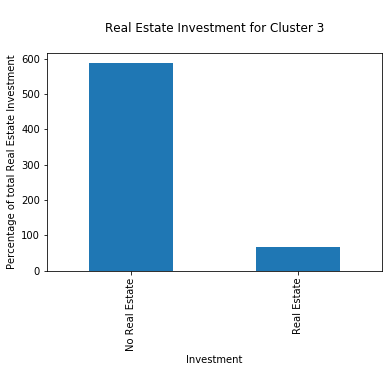

In [22]:
# Filter Real Estate for Cluster 3
data3_real = data3[['Demographics']]
dummies_real3 = pd.get_dummies(data3['real_estate'],dtype=float) #apply get_dummies
data3_real = pd.concat([data3_real, dummies_real3], axis = 1)   #combine data and dummies (axis=1 for columns)
data3_real = data3_real.reset_index(drop=True) 

# Value counts for all columns
print(data3_real.astype(bool).sum(axis=0))

# Bar Graph of Real Estate for Cluster 3
data3_real_graph = data3_real.copy()
data3_real_graph.loc[data3_real_graph['Real estate Investment']== 0.0,'Real estate Investment']='No Real Estate' # Rename
data3_real_graph.loc[data3_real_graph['Real estate Investment']== 1.0,'Real estate Investment']='Real Estate' # Rename
b = data3_real_graph['Real estate Investment'].value_counts()
bx = b.plot(kind='bar', title='\nReal Estate Investment for Cluster 3\n')
bx.set_xlabel('Investment')
bx.set_ylabel('Percentage of total Real Estate Investment')
plt.show()

# Create weighted aggregate of Real Estate for Cluster 3
data3_real = (len(data3_real[data3_real['Real estate Investment'] != 0 ]))

Demographics                                 652
Registered Retirement Savings Plan (RRSP)    110
Registered Retirement Income Fund (RRIF)      31
dtype: int64


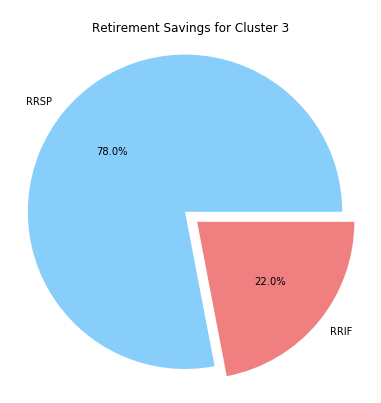

In [23]:
# Filter Retirement for Cluster 3
retire3 = ['rrsp', 'rrif']
data3_retire = data3[['Demographics']]
for r3 in retire3:
    dummies_retire3 = pd.get_dummies(data3[r3],dtype=float) #apply get_dummies
    data3_retire = pd.concat([data3_retire, dummies_retire3], axis = 1)   #combine data and dummies (axis=1 for columns)
    data3_retire = data3_retire.reset_index(drop=True) 

# Value counts for all columns
print(data3_retire.astype(bool).sum(axis=0))

# Pie Chart of Retirement for Cluster 3
labels = ['RRSP', 'RRIF']
sizes = [data3_retire['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data3_retire['Registered Retirement Income Fund (RRIF)'].value_counts()[1],
        ]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nRetirement Savings for Cluster 3')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Retirement for Cluster 3
data3_retire = (
    0.50*len(data3_retire[data3_retire['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.50*len(data3_retire[data3_retire['Registered Retirement Income Fund (RRIF)'] != 0]),
)
data3_retire = sum(data3_retire)

In [24]:
# Combine all weight aggregates for Cluster 3
c3 = {'Cluster Name': ['TBD'],
     'Age Group': ["40 to 49"],
     'Financial Confidence': [data3_fin],
     'Investment': [data3_invest],
     'Real Estate': [data3_real],
     'Retirement': [data3_retire]}
dataCluster3 = pd.DataFrame(c3)
dataCluster3

,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,40 to 49,67.5,132.2,66,70.5


## 2.5 Cluster 4

Demographics                                 644
Stocks                                        76
Mutual funds                                  49
Registered Retirement Savings Plan (RRSP)     55
Real estate Investment                       186
dtype: int64


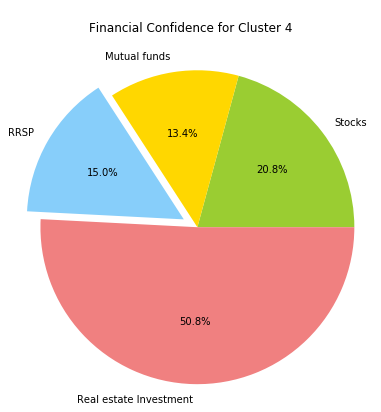

In [25]:
# Filter Financial Confidence for Cluster 4
fin4 = ['stocks', 'mutual_funds', 'rrsp', 'real_estate']
data4_fin = data4[['Demographics']]
for f4 in fin4:
    dummies_fin4 = pd.get_dummies(data4[f4],dtype=float) #apply get_dummies
    data4_fin = pd.concat([data4_fin, dummies_fin4], axis = 1)   #combine data and dummies (axis=1 for columns)
    data4_fin = data4_fin.reset_index(drop=True) 
    
# Value counts for all columns
print(data4_fin.astype(bool).sum(axis=0))

# Pie Chart of Financial Confidence for Cluster 4
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['Stocks', 'Mutual funds', 'RRSP', 'Real estate Investment']
sizes = [data4_fin['Stocks'].value_counts()[1],
         data4_fin['Mutual funds'].value_counts()[1],
         data4_fin['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data4_fin['Real estate Investment'].value_counts()[1]
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1, 0.0)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nFinancial Confidence for Cluster 4\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Financial Confidence for Cluster 4
data4_fin = (
    0.25*len(data4_fin[data4_fin['Stocks'] != 0]), 0.25*len(data4_fin[data4_fin['Mutual funds'] != 0]),
    0.25*len(data4_fin[data4_fin['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.25*len(data4_fin[data4_fin['Real estate Investment'] != 0])
)
data4_fin = sum(data4_fin)

Demographics                          644
Term deposits                          38
Stocks                                 76
Mutual funds                           49
Canada Savings Bonds                  268
Guaranteed Investment Certificates    113
dtype: int64


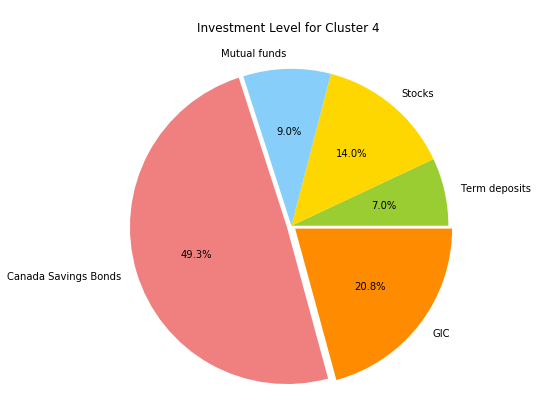

In [26]:
# Filter Investment Level for Cluster 4
invest4 = ['term', 'stocks', 'mutual_funds', 'csb', 'gic']
data4_invest = data4[['Demographics']]
for i4 in invest4:
    dummies_invest4 = pd.get_dummies(data4[i4],dtype=float) #apply get_dummies
    data4_invest = pd.concat([data4_invest, dummies_invest4], axis = 1)   #combine data and dummies (axis=1 for columns)
    data4_invest = data4_invest.reset_index(drop=True) 
    
# Value counts for all columns
print(data4_invest.astype(bool).sum(axis=0))

# Pie Chart of Investment Level for Cluster 4
labels = ['Term deposits', 'Stocks', 'Mutual funds', 'Canada Savings Bonds', 'GIC']
sizes = [data4_invest['Term deposits'].value_counts()[1],
         data4_invest['Stocks'].value_counts()[1],
         data4_invest['Mutual funds'].value_counts()[1],
         data4_invest['Canada Savings Bonds'].value_counts()[1],
         data4_invest['Guaranteed Investment Certificates'].value_counts()[1] 
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nInvestment Level for Cluster 4\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Investment Level for Cluster 4
data4_invest = (
    0.20*len(data4_invest[data4_invest['Term deposits'] != 0]),
    0.20*len(data4_invest[data4_invest['Stocks'] != 0]),
    0.20*len(data4_invest[data4_invest['Mutual funds'] != 0]),
    0.20*len(data4_invest[data4_invest['Canada Savings Bonds'] != 0]),
    0.20*len(data4_invest[data4_invest['Guaranteed Investment Certificates'] != 0])
)
data4_invest = sum(data4_invest)

Demographics              644
Real estate Investment    186
dtype: int64


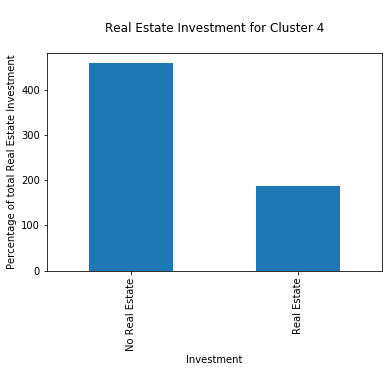

In [27]:
# Filter Real Estate for Cluster 4
data4_real = data4[['Demographics']]
dummies_real4 = pd.get_dummies(data4['real_estate'],dtype=float) #apply get_dummies
data4_real = pd.concat([data4_real, dummies_real4], axis = 1)   #combine data and dummies (axis=1 for columns)
data4_real = data4_real.reset_index(drop=True) 

# Value counts for all columns
print(data4_real.astype(bool).sum(axis=0))

# Bar Graph of Real Estate for Cluster 4
data4_real_graph = data4_real.copy()
data4_real_graph.loc[data4_real_graph['Real estate Investment']== 0.0,'Real estate Investment']='No Real Estate' # Rename
data4_real_graph.loc[data4_real_graph['Real estate Investment']== 1.0,'Real estate Investment']='Real Estate' # Rename
b = data4_real_graph['Real estate Investment'].value_counts()
bx = b.plot(kind='bar', title='\nReal Estate Investment for Cluster 4\n')
bx.set_xlabel('Investment')
bx.set_ylabel('Percentage of total Real Estate Investment')
plt.show()

# Create weighted aggregate of Real Estate for Cluster 4
data4_real = (len(data4_real[data4_real['Real estate Investment'] != 0 ]))

Demographics                                 644
Registered Retirement Savings Plan (RRSP)     55
Registered Retirement Income Fund (RRIF)      14
dtype: int64


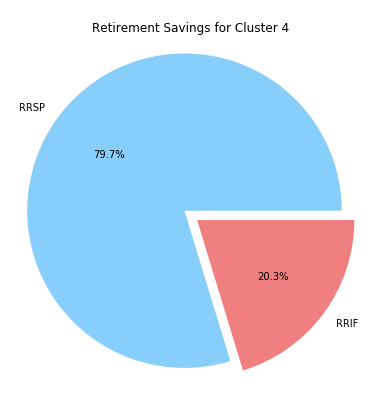

In [28]:
# Filter Retirement for Cluster 4
retire4 = ['rrsp', 'rrif']
data4_retire = data4[['Demographics']]
for r4 in retire4:
    dummies_retire4 = pd.get_dummies(data4[r4],dtype=float) #apply get_dummies
    data4_retire = pd.concat([data4_retire, dummies_retire4], axis = 1)   #combine data and dummies (axis=1 for columns)
    data4_retire = data4_retire.reset_index(drop=True) 

# Value counts for all columns   
print(data4_retire.astype(bool).sum(axis=0))

# Pie Chart of Retirement for Cluster 4
labels = ['RRSP', 'RRIF']
sizes = [data4_retire['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data4_retire['Registered Retirement Income Fund (RRIF)'].value_counts()[1],
        ]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nRetirement Savings for Cluster 4')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Retirement for Cluster 4
data4_retire = (
    0.50*len(data4_retire[data4_retire['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.50*len(data4_retire[data4_retire['Registered Retirement Income Fund (RRIF)'] != 0]),
)
data4_retire = sum(data4_retire)

In [29]:
# Combine all weight aggregates for Cluster 4
c4 = {'Cluster Name': ['TBD'],
     'Age Group': ["50 to 59"],
     'Financial Confidence': [data4_fin],
     'Investment': [data4_invest],
     'Real Estate': [data4_real],
     'Retirement': [data4_retire]}
dataCluster4 = pd.DataFrame(c4)
dataCluster4

,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,50 to 59,91.5,108.8,186,34.5


## 2.6 Cluster 5

Demographics                                 877
Stocks                                       452
Mutual funds                                  60
Registered Retirement Savings Plan (RRSP)     13
Real estate Investment                       384
dtype: int64


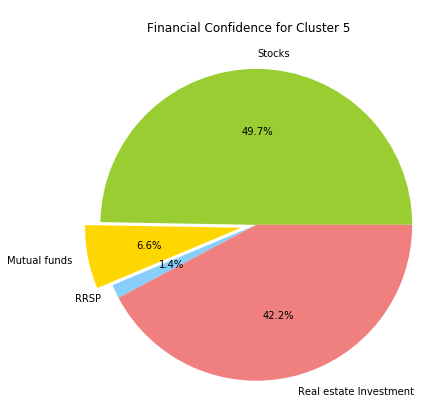

In [30]:
# Filter Financial Confidence for Cluster 5
fin5 = ['stocks', 'mutual_funds', 'rrsp', 'real_estate']
data5_fin = data5[['Demographics']]
for f5 in fin5:
    dummies_fin5 = pd.get_dummies(data5[f5],dtype=float) #apply get_dummies
    data5_fin = pd.concat([data5_fin, dummies_fin5], axis = 1)   #combine data and dummies (axis=1 for columns)
    data5_fin = data5_fin.reset_index(drop=True)

# Value counts for all columns    
print(data5_fin.astype(bool).sum(axis=0))

# Pie Chart of Financial Confidence for Cluster 5
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = ['Stocks', 'Mutual funds', 'RRSP', 'Real estate Investment']
sizes = [data5_fin['Stocks'].value_counts()[1],
         data5_fin['Mutual funds'].value_counts()[1],
         data5_fin['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data5_fin['Real estate Investment'].value_counts()[1]
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0.0, 0.0)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nFinancial Confidence for Cluster 5\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Financial Confidence for Cluster 5
data5_fin = (
    0.25*len(data5_fin[data5_fin['Stocks'] != 0]), 0.25*len(data5_fin[data5_fin['Mutual funds'] != 0]),
    0.25*len(data5_fin[data5_fin['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.25*len(data5_fin[data5_fin['Real estate Investment'] != 0])
)
data5_fin = sum(data5_fin)

Demographics                          877
Term deposits                          29
Stocks                                452
Mutual funds                           60
Canada Savings Bonds                  505
Guaranteed Investment Certificates     62
dtype: int64


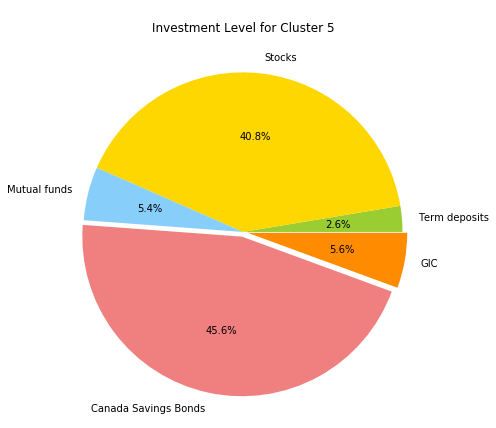

In [31]:
# Filter Investment Level for Cluster 5
invest5 = ['term', 'stocks', 'mutual_funds', 'csb', 'gic']
data5_invest = data5[['Demographics']]
for i5 in invest1:
    dummies_invest5 = pd.get_dummies(data5[i5],dtype=float) #apply get_dummies
    data5_invest = pd.concat([data5_invest, dummies_invest5], axis = 1)   #combine data and dummies (axis=1 for columns)
    data5_invest = data5_invest.reset_index(drop=True)

# Value counts for all columns
print(data5_invest.astype(bool).sum(axis=0))

# Pie Chart of Investment Level for Cluster 5
labels = ['Term deposits', 'Stocks', 'Mutual funds', 'Canada Savings Bonds', 'GIC']
sizes = [data5_invest['Term deposits'].value_counts()[1],
         data5_invest['Stocks'].value_counts()[1],
         data5_invest['Mutual funds'].value_counts()[1],
         data5_invest['Canada Savings Bonds'].value_counts()[1],
         data5_invest['Guaranteed Investment Certificates'].value_counts()[1] 
        ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nInvestment Level for Cluster 5\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Investment Level for Cluster 5
data5_invest = (
    0.20*len(data5_invest[data5_invest['Term deposits'] != 0]),
    0.20*len(data5_invest[data5_invest['Stocks'] != 0]),
    0.20*len(data5_invest[data5_invest['Mutual funds'] != 0]),
    0.20*len(data5_invest[data5_invest['Canada Savings Bonds'] != 0]),
    0.20*len(data5_invest[data5_invest['Guaranteed Investment Certificates'] != 0])
)
data5_invest = sum(data5_invest)

Demographics              877
Real estate Investment    384
dtype: int64


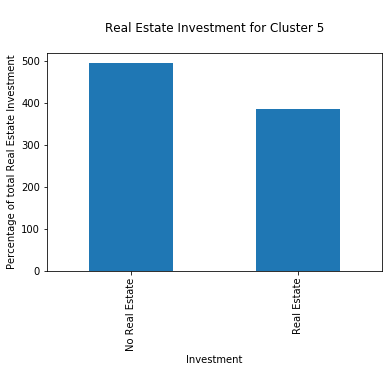

In [32]:
# Filter Real Estate for Cluster 5
data5_real = data5[['Demographics']]
dummies_real5 = pd.get_dummies(data5['real_estate'],dtype=float) #apply get_dummies
data5_real = pd.concat([data5_real, dummies_real5], axis = 1)   #combine data and dummies (axis=1 for columns)
data5_real = data5_real.reset_index(drop=True) 

# Value counts for all columns
print(data5_real.astype(bool).sum(axis=0))

# Bar Graph of Real Estate for Cluster 5
data5_real_graph = data5_real.copy()
data5_real_graph.loc[data5_real_graph['Real estate Investment']== 0.0,'Real estate Investment']='No Real Estate' # Rename
data5_real_graph.loc[data5_real_graph['Real estate Investment']== 1.0,'Real estate Investment']='Real Estate' # Rename
b = data5_real_graph['Real estate Investment'].value_counts()
bx = b.plot(kind='bar', title='\nReal Estate Investment for Cluster 5\n')
bx.set_xlabel('Investment')
bx.set_ylabel('Percentage of total Real Estate Investment')
plt.show()

# Create weighted aggregate of Real Estate for Cluster 5
data5_real = (len(data5_real[data5_real['Real estate Investment'] != 0 ]))

Demographics                                 877
Registered Retirement Savings Plan (RRSP)     13
Registered Retirement Income Fund (RRIF)       4
dtype: int64


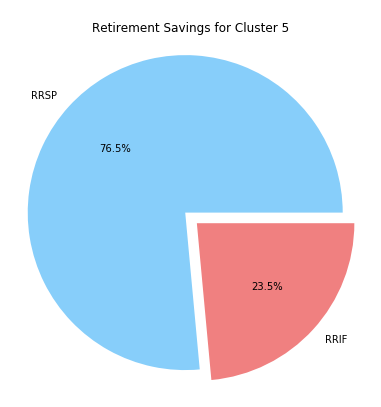

In [33]:
# Filter Retirement for Cluster 5
retire5 = ['rrsp', 'rrif']
data5_retire = data5[['Demographics']]
for r5 in retire5:
    dummies_retire5 = pd.get_dummies(data5[r5],dtype=float) #apply get_dummies
    data5_retire = pd.concat([data5_retire, dummies_retire5], axis = 1)   #combine data and dummies (axis=1 for columns)
    data5_retire = data5_retire.reset_index(drop=True) 
    
# Value counts for all columns
print(data5_retire.astype(bool).sum(axis=0))

# Pie Chart of Retirement for Cluster 5
labels = ['RRSP', 'RRIF']
sizes = [data5_retire['Registered Retirement Savings Plan (RRSP)'].value_counts()[1],
         data5_retire['Registered Retirement Income Fund (RRIF)'].value_counts()[1],
        ]
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nRetirement Savings for Cluster 5')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# Create weighted aggregate of Retirement for Cluster 5
data5_retire = (
    0.50*len(data5_retire[data5_retire['Registered Retirement Savings Plan (RRSP)'] != 0]),
    0.50*len(data5_retire[data5_retire['Registered Retirement Income Fund (RRIF)'] != 0]),
)
data5_retire = sum(data5_retire)

In [34]:
# Combine all weight aggregates for Cluster 5
c5 = {'Cluster Name': ['TBD'],
     'Age Group': ["60 and over"],
     'Financial Confidence': [data5_fin],
     'Investment': [data5_invest],
     'Real Estate': [data5_real],
     'Retirement': [data5_retire]}
dataCluster5 = pd.DataFrame(c5)
dataCluster5

,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,60 and over,227.25,221.6,384,8.5


## 2.7 All 5 Cluster

In [35]:
# Total insights for all 5 clusters
dataCluster = pd.concat([dataCluster1, dataCluster2, dataCluster3, dataCluster4, dataCluster5])
dataCluster = dataCluster.reset_index(drop=True)
dataCluster

,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,20 to 29,28.25,39.2,103,8.5
1,TBD,30 to 39,63.00,84.2,201,22.5
2,TBD,40 to 49,67.50,132.2,66,70.5
3,TBD,50 to 59,91.50,108.8,186,34.5
4,TBD,60 and over,227.25,221.6,384,8.5


In [36]:
# Sum of each column
print(dataCluster['Financial Confidence'].sum())
print(dataCluster['Investment'].sum())
print(dataCluster['Real Estate'].sum())
print(dataCluster['Retirement'].sum())

# Cluster 1
dataCluster.at[0,'Financial Confidence'] = 28.25/477.50*100
dataCluster.at[0,'Investment'] = 39.20/586.00*100
dataCluster.at[0,'Real Estate'] = 103.00/940.00*100
dataCluster.at[0,'Retirement'] = 8.50/144.50*100

# Cluster 2
dataCluster.at[1,'Financial Confidence'] = 63.00/477.50*100
dataCluster.at[1,'Investment'] = 84.20/586.00*100
dataCluster.at[1,'Real Estate'] = 201.00/940.00*100
dataCluster.at[1,'Retirement'] = 22.50/144.50*100

# Cluster 3
dataCluster.at[2,'Financial Confidence'] = 67.50/477.50*100
dataCluster.at[2,'Investment'] = 132.20/586.00*100
dataCluster.at[2,'Real Estate'] = 66.00/940.00*100
dataCluster.at[2,'Retirement'] = 70.50/144.50*100

# Cluster 4
dataCluster.at[3,'Financial Confidence'] = 91.50/477.50*100
dataCluster.at[3,'Investment'] = 108.80/586.00*100
dataCluster.at[3,'Real Estate'] = 186.00/940.00*100
dataCluster.at[3,'Retirement'] = 34.50/144.50*100

# Cluster 5
dataCluster.at[4,'Financial Confidence'] = 227.25/477.50*100
dataCluster.at[4,'Investment'] = 221.60/586.00*100
dataCluster.at[4,'Real Estate'] = 384.00/940.00*100
dataCluster.at[4,'Retirement'] = 8.50/144.50*100

# Percentage of total insights for all 5 clusters
dataCluster

477.5
586.0
940
144.5


,Cluster Name,Age Group,Financial Confidence,Investment,Real Estate,Retirement
0,TBD,20 to 29,5.916230,6.689420,10,5.882353
1,TBD,30 to 39,13.193717,14.368601,21,15.570934
2,TBD,40 to 49,14.136126,22.559727,7,48.788927
3,TBD,50 to 59,19.162304,18.566553,19,23.875433
4,TBD,60 and over,47.591623,37.815700,40,5.882353


In [37]:
dataCluster['Financial Confidence'].value_counts()

5.916230     1
19.162304    1
14.136126    1
13.193717    1
47.591623    1
Name: Financial Confidence, dtype: int64

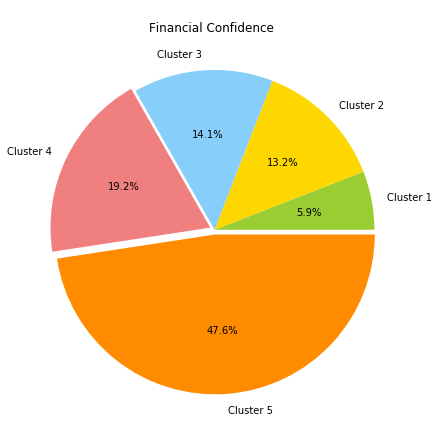

In [38]:
# Pie Chart of Financial Confidence
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
sizes = dataCluster['Financial Confidence']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nFinancial Confidence\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

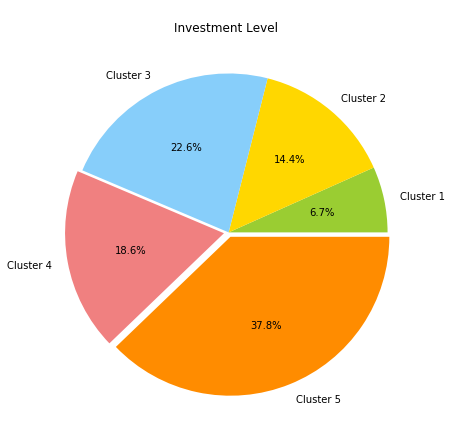

In [39]:
# Pie Chart of Investment Level
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
sizes = dataCluster['Investment']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nInvestment Level\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

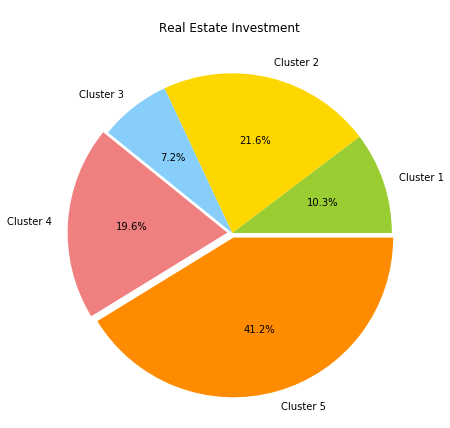

In [40]:
# Pie Chart of Real Estate Investment
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
sizes = dataCluster['Real Estate']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nReal Estate Investment\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

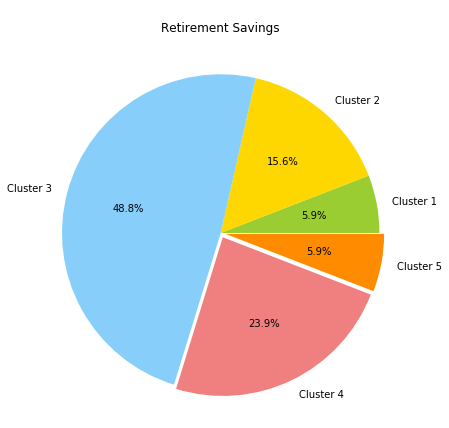

In [41]:
# Pie Chart of Retirement Savings
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
sizes = dataCluster['Retirement']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'darkorange']
explode = (0, 0, 0, 0.03, 0.03)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes((0,0,.5,1))
ax1.set_title('\nRetirement Savings\n')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
ax1.axis('scaled')
plt.show()

# 3 Data Preprocessing

Note that we are using get_dummies since it converts strings directly to one-hot-representation all in one go.

Otherwise, we would need to use label encoder to map data into integers, and then using one-hot-encoder to convert to one-hot-representation but individually.

In [42]:
categorical = ['Gender', 'Demographics', 'Ethnicity', 'Religion', 'Immigration', 'Education',
               'Field.of.Study', 'Profession', 'Marital.Status', 'Family.Size', 'Dwelling', 'Personal.Income',
               'credit_card', 'pay_balance', 'refuse_cc', 'mortgage', 'budget', 'unexpected_500',
               'unexpected_5000', 'fin_situation', 'csb', 'gic', 'real_estate', 'mutual_funds',
               'resp', 'rrif', 'rrsp', 'stocks', 'term', 'other']

# Using get_dummies to convert data into one-hot-representations on dataset
for cat in categorical:
    dummies = pd.get_dummies(data[cat], prefix = cat, prefix_sep = "_", dtype=float) #apply get_dummies
    data = pd.concat([data, dummies], axis = 1)   #combine data and dummies (axis=1 for columns)
data.drop(categorical, axis = 1, inplace = True)  #drop original columns, inplace = True drops it permanently
data = data.reset_index(drop=True)                #re-index

In [63]:
data = data.copy()        #make another copy
print(data.shape)         #check for size and column

(3325, 156)


# 4 Data Splitting

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data, test_size=0.2)  #keep 20% as test set
x_train = x_train.reset_index(drop=True)                 #re-index
x_test = x_test.reset_index(drop=True)  
print(x_train.shape, x_test.shape)

(2660, 156) (665, 156)


# 5 Setting up Encoder

In [ ]:
from keras.layers import Input, Dense             # Input is orignal layer, Dense connects other layer
from keras.models import Model
from keras import regularizers                    # Regularizer
from keras import backend as K                    # Import backend engine
from keras.callbacks import EarlyStopping         # stops model if no improvements from test data when using training data
import pickle                                     # for data storing (0 and 1)   
from sklearn.preprocessing import StandardScaler,MinMaxScaler

x_train = x_train.values                          #convert to matrix form
x_train = MinMaxScaler().fit_transform(x_train)   #convert to [0,1] scaling using MinMaxScaler
x_test = x_test.values
x_test = MinMaxScaler().fit_transform(x_test)

input_size = 156
hidden_size = 512
code_size = 3
n_epochs = 156   #number of times we pass the entire dataset through the network
batch_size = 100 #number of batches in the entire dataset

input_data = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_data)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_data = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_data, output_data)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'mae', 'mape', 'cosine']) #metrics
autoencoder_history = autoencoder.fit(x_train, x_train, epochs=n_epochs, 
                                      batch_size = batch_size, validation_data=(x_test, x_test), #test data for overfitting
                                      callbacks = [EarlyStopping(monitor='loss',patience = 5)])  #callbacks if no improvements

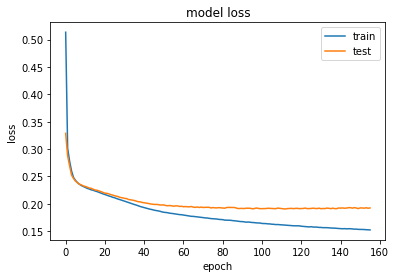

In [66]:
# Plot Training & Testing loss values
plt.plot(autoencoder_history.history['loss'])
plt.plot(autoencoder_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

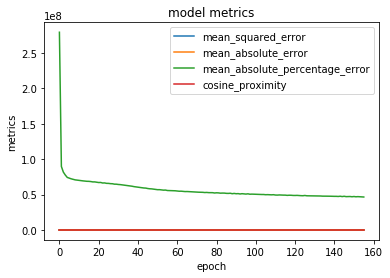

In [71]:
# Plot metrics
from matplotlib import pyplot
pyplot.plot(autoencoder_history.history['mean_squared_error'])
pyplot.plot(autoencoder_history.history['mean_absolute_error'])
pyplot.plot(autoencoder_history.history['mean_absolute_percentage_error'])
pyplot.plot(autoencoder_history.history['cosine_proximity'])
plt.title('model metrics')
plt.ylabel('metrics')
plt.xlabel('epoch')
plt.legend(['mean_squared_error', 'mean_absolute_error' , 'mean_absolute_percentage_error',
            'cosine_proximity'], loc='upper right')
pyplot.show()

# 6 Clustering dimension reduced data in 3D (autoencoder)

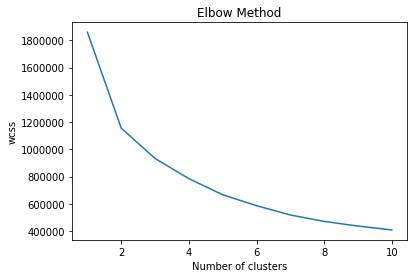

In [34]:
# Get code layer
get_3rd_layer_output = K.function([autoencoder.layers[0].input],[autoencoder.layers[2].output]) #first and third layer
layer_output = get_3rd_layer_output([x_train])[0]
layer_output

# Choosing optimal number of clusters
from sklearn.cluster import KMeans
X = layer_output.copy()
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)    # Calculates Sum of Squared Distance
plt.plot(range(1,11),wcss)      # Visualize WCSS (within cluster sum of square)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

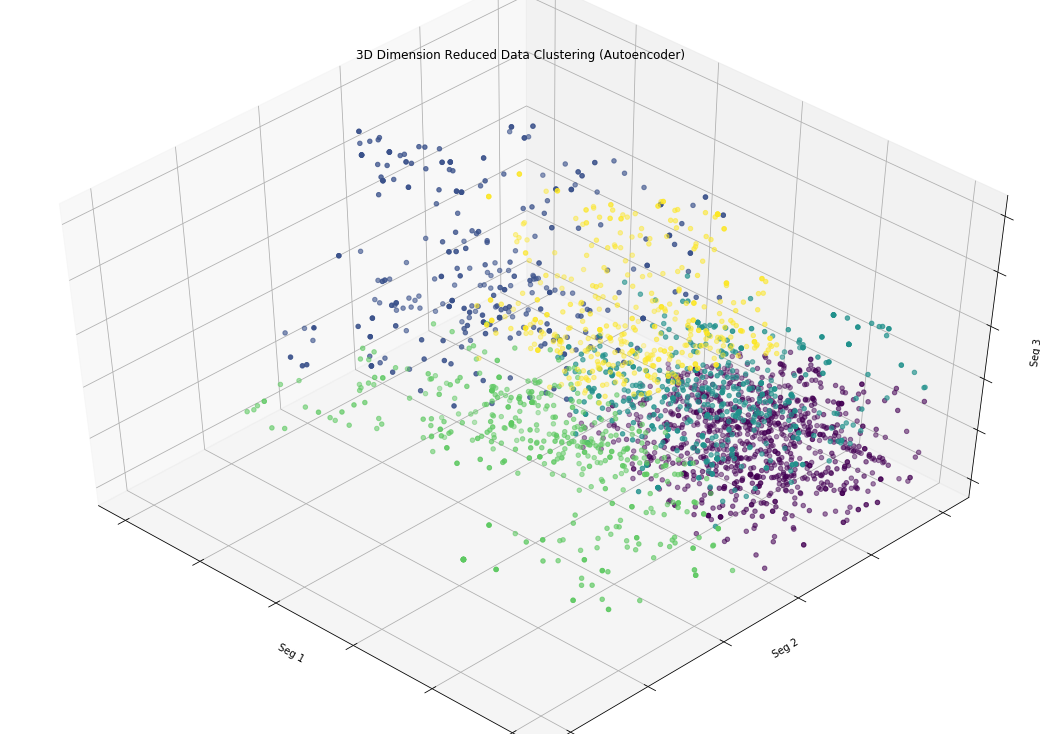

In [35]:
# Convert array back to DataFrame
layer_output = pd.DataFrame(layer_output, columns=['Seg 1', 'Seg 2', 'Seg 3'])

# Cluster using k means (5 Clusters)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5, init="k-means++", n_init=10)
kmean.fit(layer_output)
x=kmean.fit_predict(layer_output)                             
layer_output["Cluster"] = x                                    #add new cluster columns
layer_output = layer_output.sort_values(["Cluster"])           #sort data by clusters

# Convert DataFrame to matrix for visualization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
layer_output = layer_output.values                          #convert to matrix form
layer_output = MinMaxScaler().fit_transform(layer_output)   #convert to [0,1] scaling using MinMaxScaler

# Visualizing the clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(layer_output[:,0], layer_output[:,1], layer_output[:,2], c=layer_output[:,-1]) #Color based on cluster column
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Seg 1')
ax.set_ylabel('Seg 2')
ax.set_zlabel('Seg 3')
ax.set_title("3D Dimension Reduced Data Clustering (Autoencoder)")
ax.dist = 9

# 7 Clustering dimension reduced data in 2D (autoencoder)

In [ ]:
data = data.copy()        #make another copy

#Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data, test_size=0.2)  #keep 20% as test set
x_train = x_train.reset_index(drop=True)                 #re-index
x_test = x_test.reset_index(drop=True)  

#Setting up Encoder
from keras.layers import Input, Dense             # Input is orignal layer, Dense connects other layer
from keras.models import Model
from keras import regularizers                    # Regularizer
from keras import backend as K                    # Import backend engine
from keras.callbacks import EarlyStopping         # stops model if no improvements from test data when using training data
import pickle                                     # for data storing (0 and 1)   
from sklearn.preprocessing import StandardScaler,MinMaxScaler

x_train = x_train.values                          #convert to matrix form
x_train = MinMaxScaler().fit_transform(x_train)   #convert to [0,1] scaling using MinMaxScaler
x_test = x_test.values
x_test = MinMaxScaler().fit_transform(x_test)

input_size = 156
hidden_size = 512
code_size = 2
n_epochs = 156   #number of times we pass the entire dataset through the network
batch_size = 100 #number of batches in the entire dataset

input_data = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_data)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_data = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_data, output_data)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'mae', 'mape', 'cosine']) #metrics
autoencoder_history = autoencoder.fit(x_train, x_train, epochs=n_epochs, 
                                      batch_size = batch_size, validation_data=(x_test, x_test), #test data for overfitting
                                      callbacks = [EarlyStopping(monitor='loss',patience = 5)])  #callbacks if no improvements

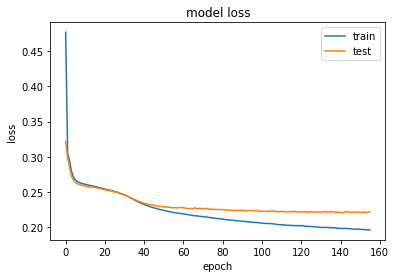

In [73]:
# Plot Training & Testing loss values
plt.plot(autoencoder_history.history['loss'])
plt.plot(autoencoder_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

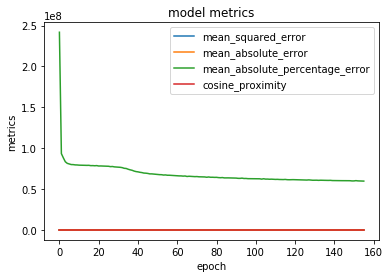

In [74]:
# Plot metrics
from matplotlib import pyplot
pyplot.plot(autoencoder_history.history['mean_squared_error'])
pyplot.plot(autoencoder_history.history['mean_absolute_error'])
pyplot.plot(autoencoder_history.history['mean_absolute_percentage_error'])
pyplot.plot(autoencoder_history.history['cosine_proximity'])
plt.title('model metrics')
plt.ylabel('metrics')
plt.xlabel('epoch')
plt.legend(['mean_squared_error', 'mean_absolute_error' , 'mean_absolute_percentage_error',
            'cosine_proximity'], loc='upper right')
pyplot.show()

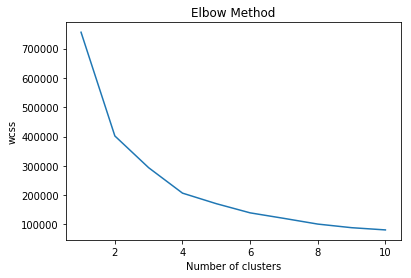

In [46]:
# Get code layer
get_3rd_layer_output = K.function([autoencoder.layers[0].input],[autoencoder.layers[2].output]) #first and third layer
layer_output = get_3rd_layer_output([x_train])[0]
layer_output

# Choosing optimal number of clusters
from sklearn.cluster import KMeans
X = layer_output.copy()
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)    # Calculates Sum of Squared Distance
plt.plot(range(1,11),wcss)      # Visualize WCSS (within cluster sum of square)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Text(0.5, 1.0, '2D Dimension Reduced Data Clustering (Autoencoder)')

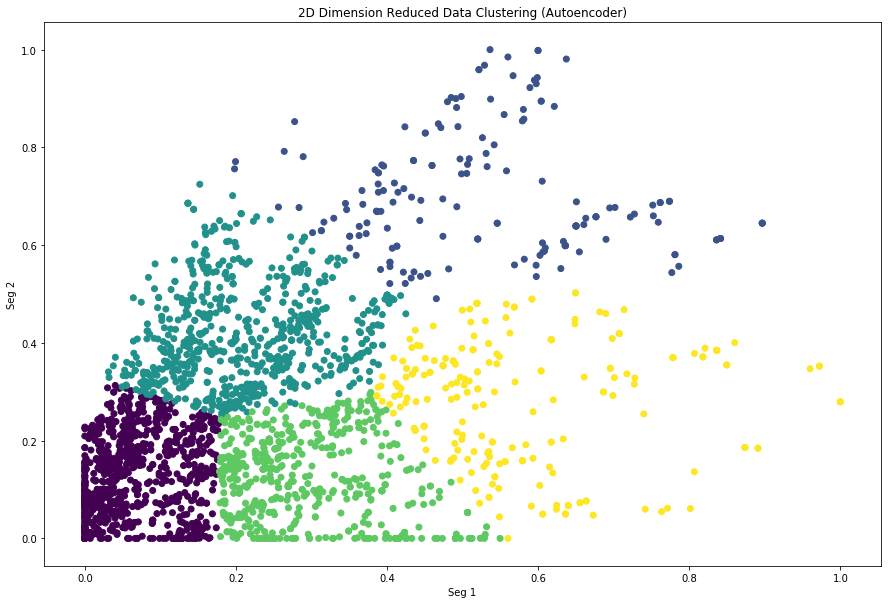

In [47]:
# Convert array back to DataFrame
layer_output = pd.DataFrame(layer_output, columns=['Seg 1', 'Seg 2'])

# Cluster using k means (5 Clusters)
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=5, init="k-means++", n_init=10)
kmean.fit(layer_output)
x = kmean.fit_predict(layer_output)                             
layer_output["Cluster"] = x                                    #add new cluster columns
layer_output = layer_output.sort_values(["Cluster"])           #sort data by clusters

# Convert DataFrame to matrix for visualization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
layer_output = layer_output.values                          #convert to matrix form
layer_output = MinMaxScaler().fit_transform(layer_output)   #convert to [0,1] scaling using MinMaxScaler

# Visualizing the clusters
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(layer_output[:,0], layer_output[:,1], c=layer_output[:,-1]) #Color based on cluster column
plt.xlabel("Seg 1")
plt.ylabel("Seg 2")
plt.title("2D Dimension Reduced Data Clustering (Autoencoder)")